In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

## Initialization
We start with the usual setup, generating an `Observables` object and computing a fiducial.

In [3]:
# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)
# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'non linear': 'halofit'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', classy_dict=classy_template)


## Checking Derivatives

In order to check derivative convergence, we use the two functions `check_deriv_compute` and `check_deriv_plot`, passing it step sizes and a template. For example, here we are checking the derivative of the normalized hubble constant $h$, and we use step sizes of $0.01, 0.02, 0.03, 0.04, 0.1$. We also pass the `verbose=True` option to print out the dictionary outputs.

In [4]:
obs.check_deriv_compute("h", [0.01, 0.02, 0.03, 0.04, 0.1], classy_template, verbose=True)

{'output': 'tCl pCl lCl', 'l_max_scalars': 2500, 'lensing': 'yes', 'non linear': 'halofit', 'omega_b': 0.02222, 'omega_cdm': 0.1197, 'h': 0.7, 'A_s': 2.1955e-09, 'n_s': 0.9655, 'tau_reio': 0.06}
{'output': 'tCl pCl lCl', 'l_max_scalars': 2500, 'lensing': 'yes', 'non linear': 'halofit', 'omega_b': 0.02222, 'omega_cdm': 0.1197, 'h': 0.71, 'A_s': 2.1955e-09, 'n_s': 0.9655, 'tau_reio': 0.06}
{'output': 'tCl pCl lCl', 'l_max_scalars': 2500, 'lensing': 'yes', 'non linear': 'halofit', 'omega_b': 0.02222, 'omega_cdm': 0.1197, 'h': 0.72, 'A_s': 2.1955e-09, 'n_s': 0.9655, 'tau_reio': 0.06}
{'output': 'tCl pCl lCl', 'l_max_scalars': 2500, 'lensing': 'yes', 'non linear': 'halofit', 'omega_b': 0.02222, 'omega_cdm': 0.1197, 'h': 0.73, 'A_s': 2.1955e-09, 'n_s': 0.9655, 'tau_reio': 0.06}
{'output': 'tCl pCl lCl', 'l_max_scalars': 2500, 'lensing': 'yes', 'non linear': 'halofit', 'omega_b': 0.02222, 'omega_cdm': 0.1197, 'h': 0.7899999999999999, 'A_s': 2.1955e-09, 'n_s': 0.9655, 'tau_reio': 0.06}


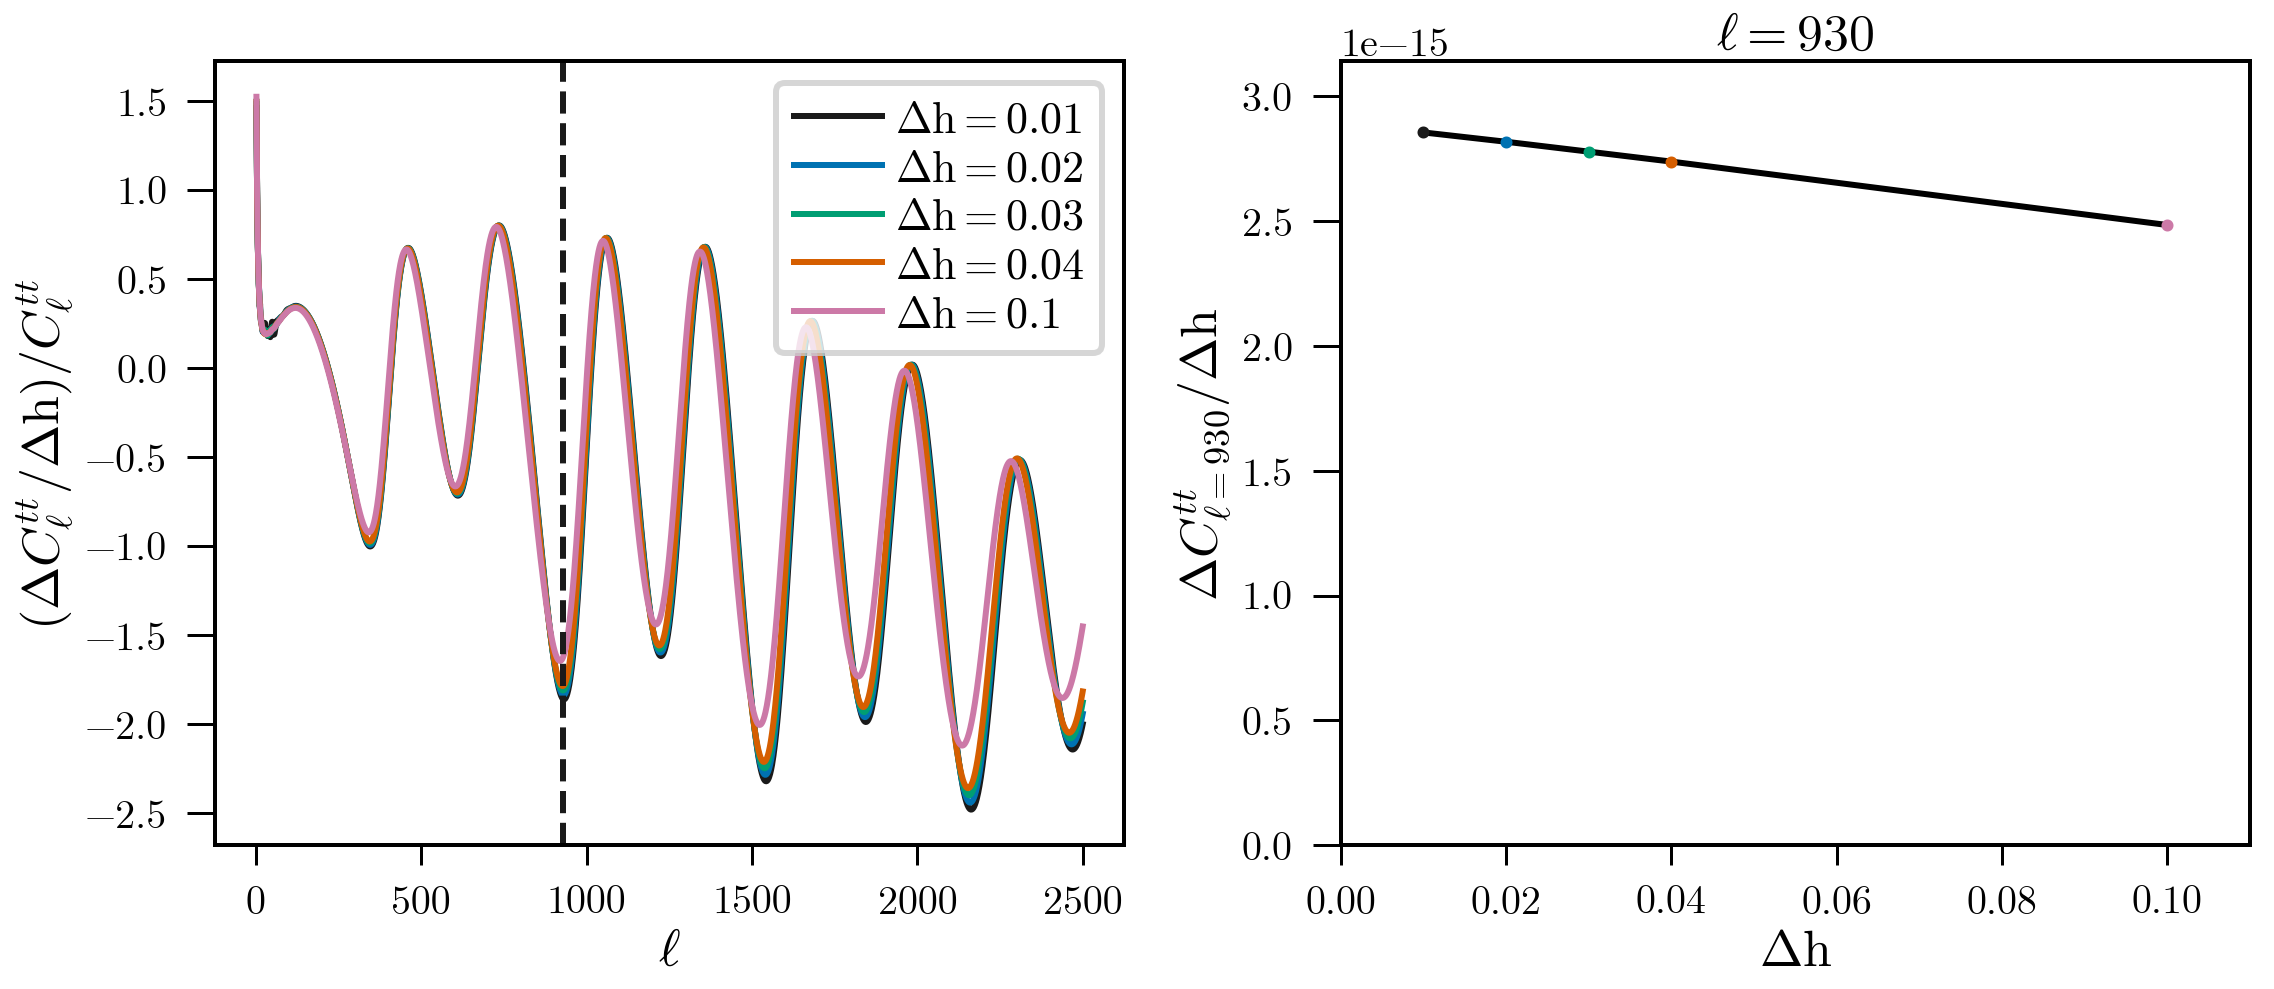

In [5]:
obs.check_deriv_plot('h', ell=930, l_max=2500)

We note that the derivative is stable to the stepsize up to a few percent, for an order of magnitude in the step. That's great! This is what we would describe as "converged". A rule of thumb is 20% stability in the derivative for a factor of 2 change in the step size, which is certainly achieved here. Now let's see what happens when we try some huge step sizes.

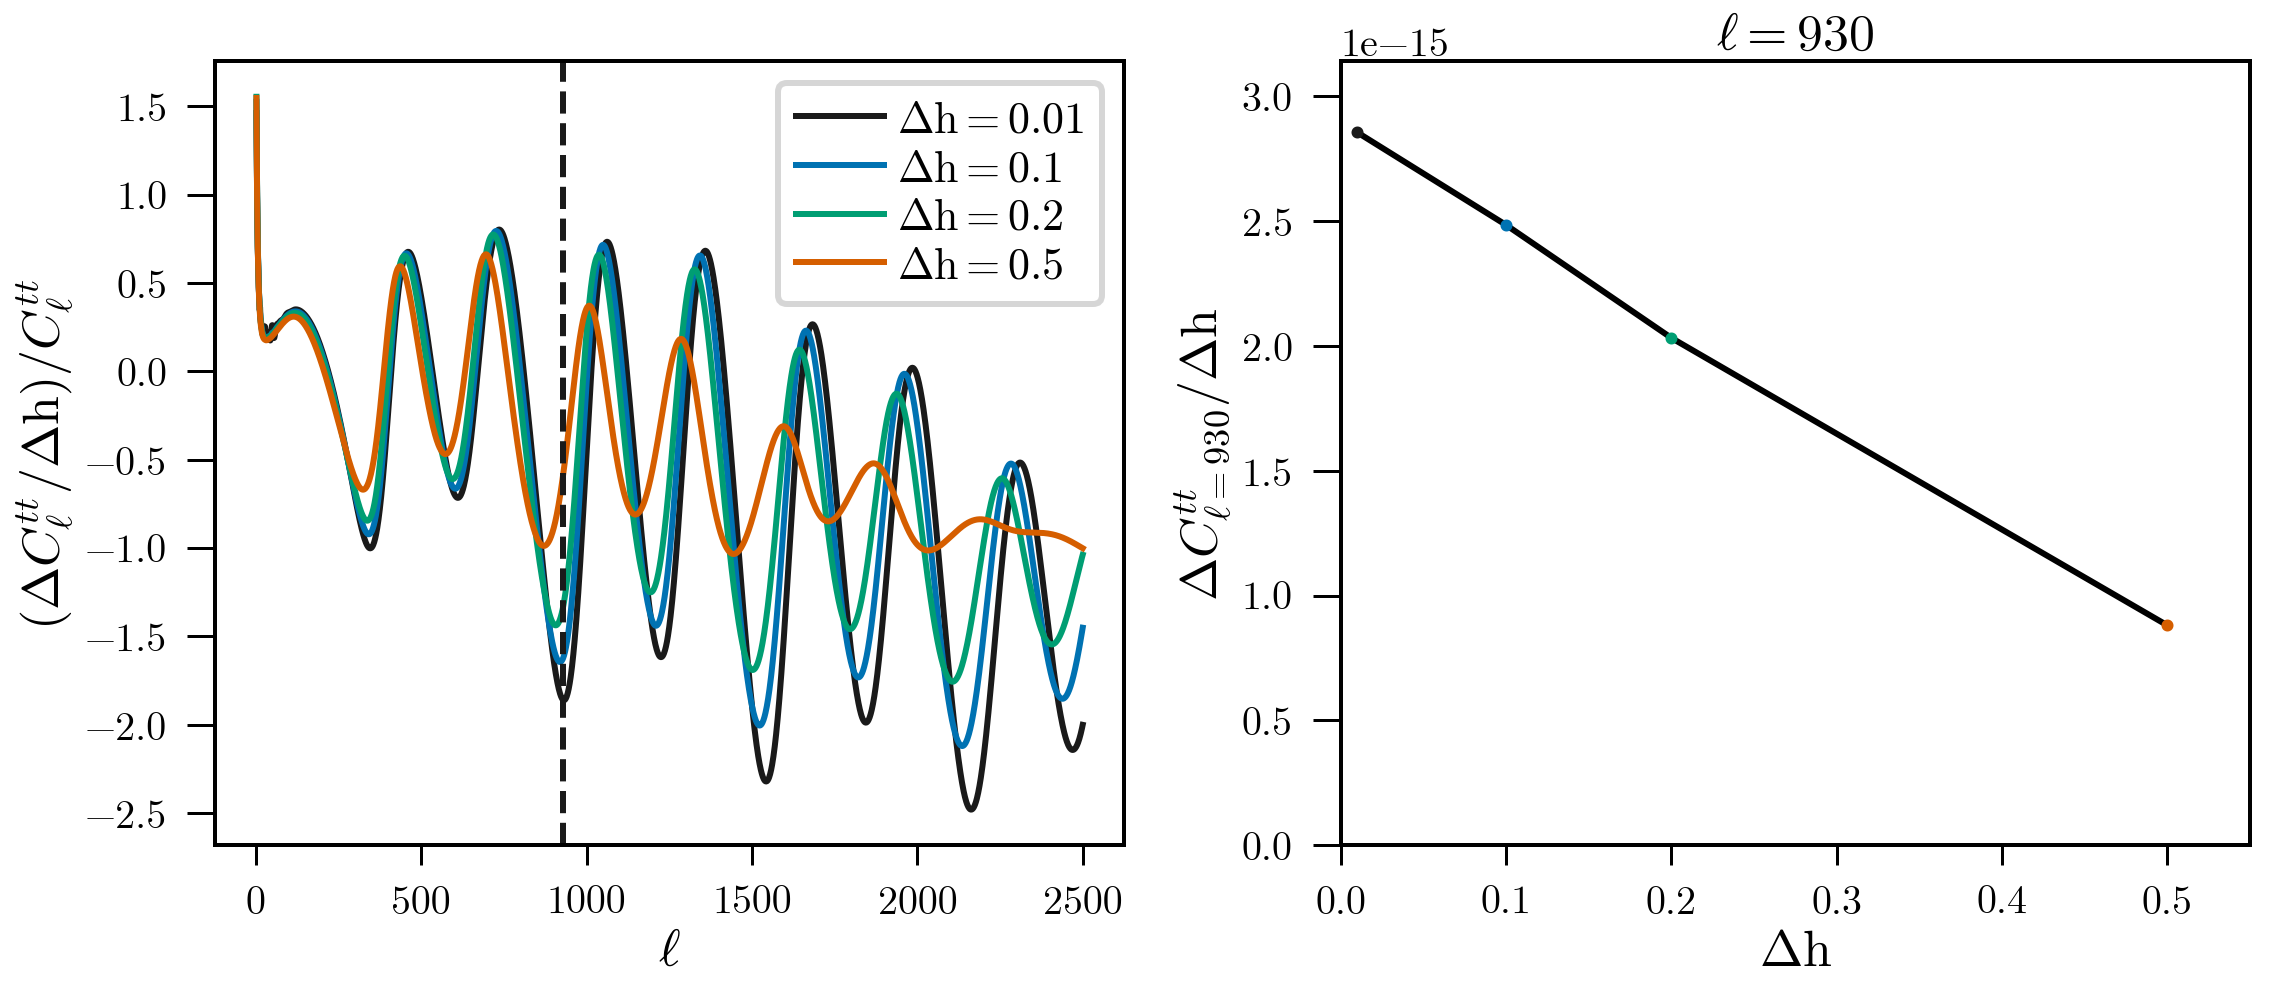

In [6]:
obs.check_deriv_compute("h", [0.01, 0.1, 0.2, 0.5], classy_template)
obs.check_deriv_plot('h', ell=930, l_max=2500)

As you can see, there is a strong dependence on the step when we make the step very large. This is very bad! You've chosen a stepsize that is too large. Now let's see what happens when the stepsize is too small.

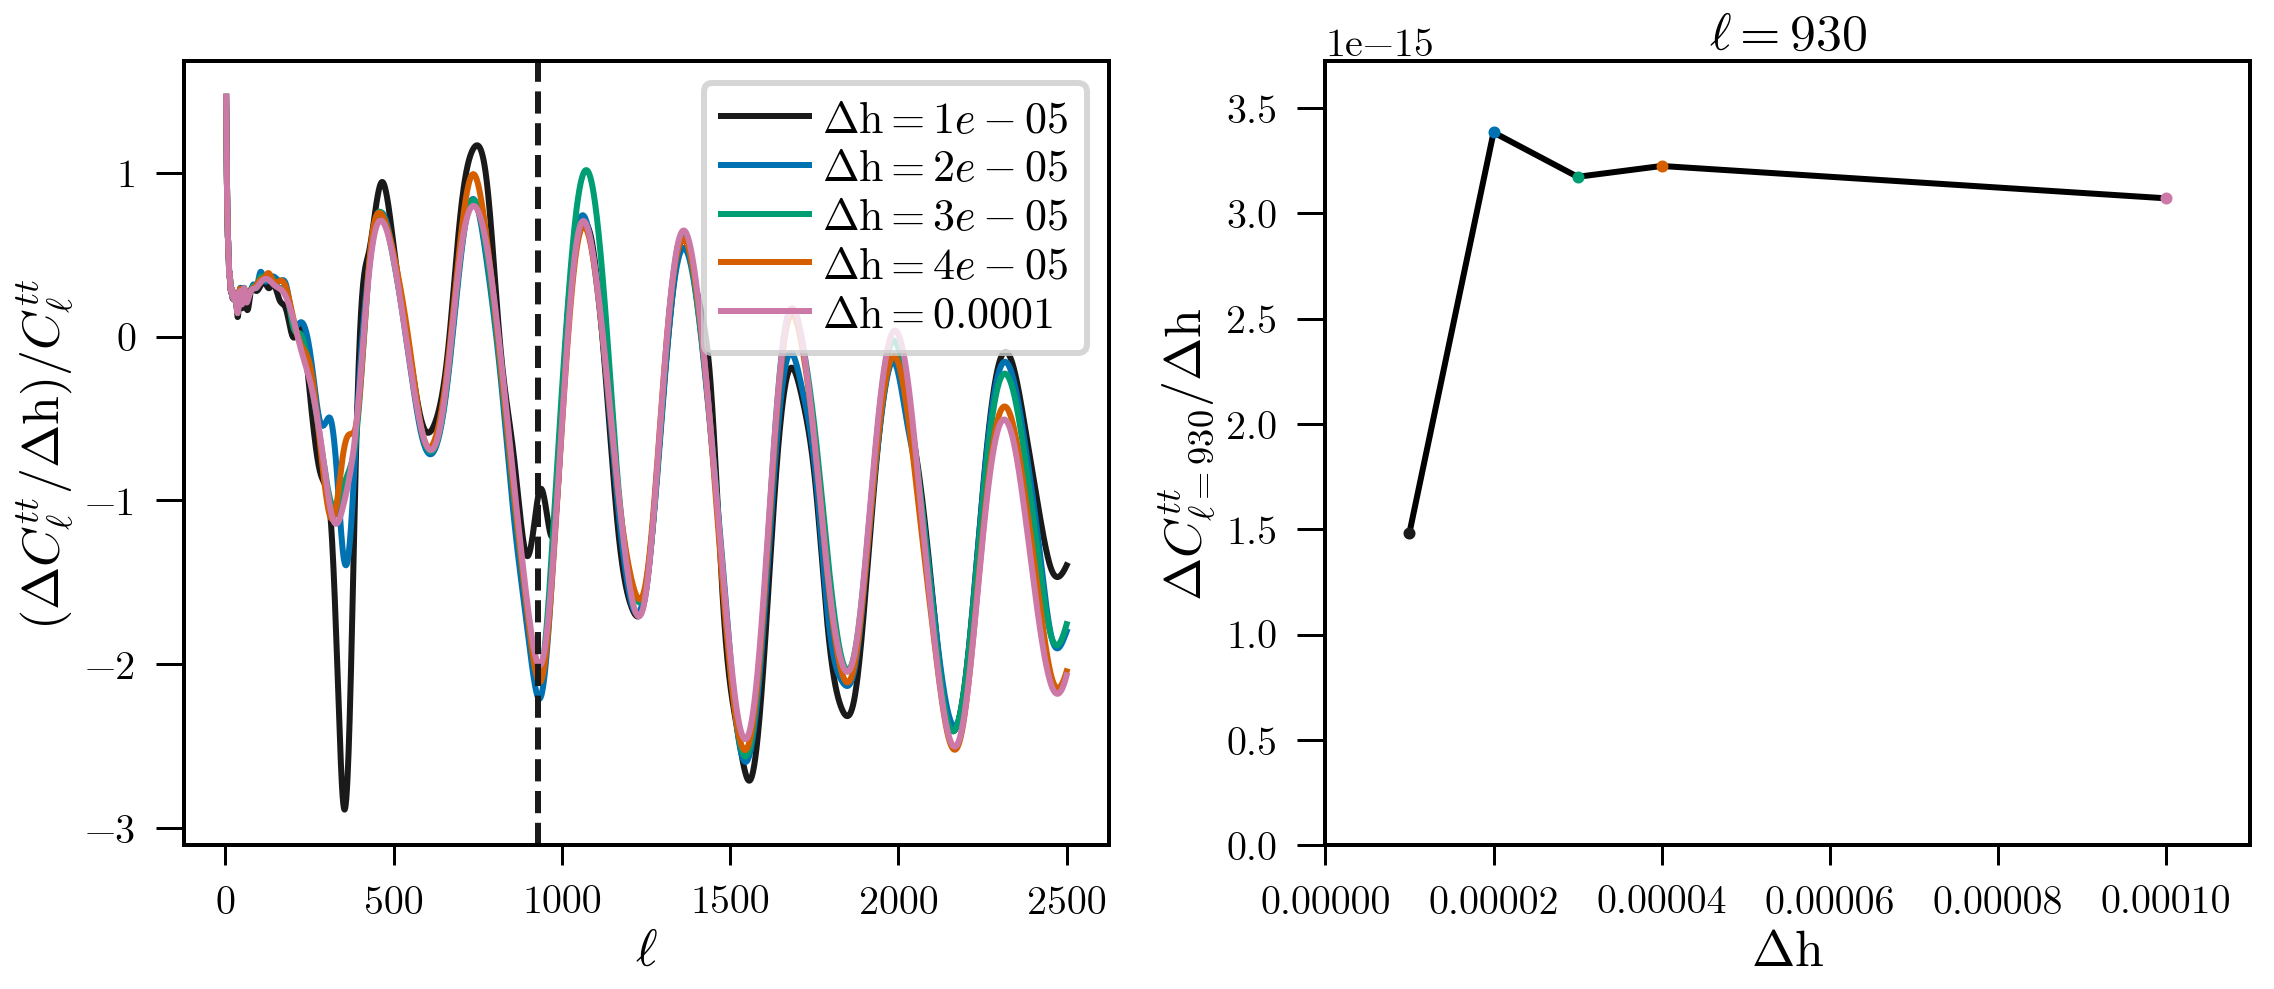

In [7]:
obs.check_deriv_compute("h", [0.00001, 0.00002, 0.00003, 0.00004, 0.0001], classy_template)
obs.check_deriv_plot('h', ell=930, l_max=2500)

Now you are encountering some numerical noise. This is especially evidence for low $\ell$ in the left plot.

**Summary: you have to choose a stepsize that is not too large (so that it is converged) but not too small (where you hit numerical noise).**